# Import libraries

In [88]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
import time

#import river, an online learning library
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from river import feature_selection
from river import stats
from river import imblearn
from river import preprocessing
from river import evaluate
from river import metrics

# 1) DATA PREPROCESSING

Read the RAW IoTID20 dataset

In [89]:
df = pd.read_csv("C:\\Users\\jaswa\\Downloads\\IoT Network Intrusion Dataset-20230802T155717Z-001\\IoT Network Intrusion Dataset\\IoT Network Intrusion Dataset.csv")
print(df)

                                          Flow_ID           Src_IP  Src_Port  \
0        192.168.0.13-192.168.0.16-10000-10101-17     192.168.0.13     10000   
1         192.168.0.13-222.160.179.132-554-2179-6  222.160.179.132      2179   
2          192.168.0.13-192.168.0.16-9020-52727-6     192.168.0.16     52727   
3          192.168.0.13-192.168.0.16-9020-52964-6     192.168.0.16     52964   
4       192.168.0.1-239.255.255.250-36763-1900-17      192.168.0.1     36763   
...                                           ...              ...       ...   
625778   192.168.0.24-210.89.164.90-56112-8043-17     192.168.0.24     56112   
625779    192.168.0.13-222.131.171.244-554-4570-6  222.131.171.244      4570   
625780     192.168.0.13-192.168.0.16-9020-52739-6     192.168.0.16     52739   
625781     192.168.0.13-192.168.0.16-9020-49784-6     192.168.0.13      9020   
625782   192.168.0.13-192.168.0.16-10000-10101-17     192.168.0.13     10000   

                 Dst_IP  Dst_Port  Prot

In [90]:
df.dtypes

Flow_ID      object
Src_IP       object
Src_Port      int64
Dst_IP       object
Dst_Port      int64
             ...   
Idle_Max    float64
Idle_Min    float64
Label        object
Cat          object
Sub_Cat      object
Length: 86, dtype: object

Finding the Number of different datatypes in the dataset

In [91]:
df.dtypes.value_counts()

float64    45
int64      34
object      7
dtype: int64

Printing all the object datatype columns

In [92]:
object_columns = df.select_dtypes(include=['object'])
print(object_columns)

                                          Flow_ID           Src_IP  \
0        192.168.0.13-192.168.0.16-10000-10101-17     192.168.0.13   
1         192.168.0.13-222.160.179.132-554-2179-6  222.160.179.132   
2          192.168.0.13-192.168.0.16-9020-52727-6     192.168.0.16   
3          192.168.0.13-192.168.0.16-9020-52964-6     192.168.0.16   
4       192.168.0.1-239.255.255.250-36763-1900-17      192.168.0.1   
...                                           ...              ...   
625778   192.168.0.24-210.89.164.90-56112-8043-17     192.168.0.24   
625779    192.168.0.13-222.131.171.244-554-4570-6  222.131.171.244   
625780     192.168.0.13-192.168.0.16-9020-52739-6     192.168.0.16   
625781     192.168.0.13-192.168.0.16-9020-49784-6     192.168.0.13   
625782   192.168.0.13-192.168.0.16-10000-10101-17     192.168.0.13   

                 Dst_IP               Timestamp    Label     Cat  \
0          192.168.0.16  25/07/2019 03:25:53 AM  Anomaly   Mirai   
1          192.168.0.13

Encoding all the Object Datatype Columns :
         1) Flow_ID 
         2) Src_IP
         3) Dst_IP               
         4) Timestamp 
         5) Label     
         6) Cat
         7) Sub_Cat  

In [93]:
from sklearn.preprocessing import LabelEncoder
Flow_ID_types = df["Flow_ID"].values
encoder = LabelEncoder()
# use LabelEncoder to encode the threat types in numeric values
flow_ID = encoder.fit_transform(Flow_ID_types)
print("Shape of target vector : ",flow_ID.shape)

Shape of target vector :  (625783,)


In [47]:
flow_ID

array([12446, 22760, 12691, ..., 12695, 12682, 12446])

In [48]:
from sklearn.preprocessing import LabelEncoder
Src_IP_types = df["Src_IP"].values
encoder = LabelEncoder()
# use LabelEncoder to encode the threat types in numeric values
src_IP = encoder.fit_transform(Src_IP_types)
print("Shape of target vector : ",src_IP.shape)

Shape of target vector :  (625783,)


In [49]:
src_IP

array([25883, 34617, 25886, ..., 25886, 25883, 25883])

In [50]:
from sklearn.preprocessing import LabelEncoder
Dst_IP_types = df["Dst_IP"].values
encoder = LabelEncoder()
# use LabelEncoder to encode the threat types in numeric values
dst_IP = encoder.fit_transform(Dst_IP_types)
print("Shape of target vector : ",dst_IP.shape)

Shape of target vector :  (625783,)


In [51]:
dst_IP

array([203, 200, 200, ..., 200, 203, 203])

In [52]:
from sklearn.preprocessing import LabelEncoder
Timestamp_types = df["Timestamp"].values
encoder = LabelEncoder()
# use LabelEncoder to encode the threat types in numeric values
timestamp = encoder.fit_transform(Timestamp_types)
print("Shape of target vector : ",timestamp)

Shape of target vector :  [3496 3664 2082 ... 2285 2872 3453]


In [53]:
timestamp

array([3496, 3664, 2082, ..., 2285, 2872, 3453])

In [54]:
from sklearn.preprocessing import LabelEncoder
Label_types = df["Label"].values
encoder = LabelEncoder()
# use LabelEncoder to encode the threat types in numeric values
label = encoder.fit_transform(Label_types)
print("Shape of target vector : ",label)

Shape of target vector :  [0 0 0 ... 0 1 0]


In [55]:
from sklearn.preprocessing import LabelEncoder
Cat_types = df["Cat"].values
encoder = LabelEncoder()
# use LabelEncoder to encode the threat types in numeric values
cat = encoder.fit_transform(Cat_types)
print("Shape of target vector : ",cat)

Shape of target vector :  [2 0 4 ... 4 3 2]


In [56]:
from sklearn.preprocessing import LabelEncoder
Sub_Cat_types = df["Sub_Cat"].values
encoder = LabelEncoder()
# use LabelEncoder to encode the threat types in numeric values
sub_cat = encoder.fit_transform(Sub_Cat_types)
print("Shape of target vector : ",sub_cat)

Shape of target vector :  [2 0 8 ... 8 6 5]


In [57]:
columns_to_drop = ["Flow_ID","Src_IP","Dst_IP","Timestamp","Label","Cat","Sub_Cat"]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Print the modified DataFrame
print(df)


        Src_Port  Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  \
0          10000     10101        17             75             1   
1           2179       554         6           5310             1   
2          52727      9020         6            141             0   
3          52964      9020         6            151             0   
4          36763      1900        17            153             2   
...          ...       ...       ...            ...           ...   
625778     56112      8043        17            277             1   
625779      4570       554         6           1658             0   
625780     52739      9020         6             77             1   
625781      9020     49784         6            240             2   
625782     10000     10101        17            198             2   

        Tot_Bwd_Pkts  TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  \
0                  1            982.0           1430.0            982.0   
1                  2 

In [58]:
df.columns

Index(['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts',
       'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio', 'Pkt_Size_Avg',
       

# 2) DEFINING FEATURE MATRIX 

In [59]:
x_col = ['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts',
       'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio', 'Pkt_Size_Avg',
       'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg', 'Fwd_Byts/b_Avg',
       'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg', 'Bwd_Byts/b_Avg',
       'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg', 'Subflow_Fwd_Pkts',
       'Subflow_Fwd_Byts', 'Subflow_Bwd_Pkts', 'Subflow_Bwd_Byts',
       'Init_Fwd_Win_Byts', 'Init_Bwd_Win_Byts', 'Fwd_Act_Data_Pkts',
       'Fwd_Seg_Size_Min', 'Active_Mean', 'Active_Std', 'Active_Max',
       'Active_Min', 'Idle_Mean', 'Idle_Std', 'Idle_Max', 'Idle_Min']

x = df[x_col].copy()

x.insert(79,"Src_IP",src_IP)
x.insert(80,"Dst_IP",dst_IP)
x.insert(81,"Timestamp",timestamp)
x.insert(82,"Label",label)
x.insert(83,"Cat",cat)
x.insert(84,"Sub_Cat",sub_cat)
x.insert(85,"Flow_ID",flow_ID)

x.shape

(625783, 86)

In [60]:
x_col = x.columns

In [61]:
x

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Idle_Std,Idle_Max,Idle_Min,Src_IP,Dst_IP,Timestamp,Label,Cat,Sub_Cat,Flow_ID
0,10000,10101,17,75,1,1,982.0,1430.0,982.0,982.0,...,0.000000,75.0,75.0,25883,203,3496,0,2,2,12446
1,2179,554,6,5310,1,2,0.0,0.0,0.0,0.0,...,2261.327486,4254.0,1056.0,34617,200,3664,0,0,0,22760
2,52727,9020,6,141,0,3,0.0,2806.0,0.0,0.0,...,0.707107,71.0,70.0,25886,200,2082,0,4,8,12691
3,52964,9020,6,151,0,2,0.0,2776.0,0.0,0.0,...,0.000000,151.0,151.0,25886,200,791,0,2,4,12704
4,36763,1900,17,153,2,1,886.0,420.0,452.0,434.0,...,0.707107,77.0,76.0,25881,317,1040,0,2,4,611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,56112,8043,17,277,1,1,18.0,18.0,18.0,18.0,...,0.000000,277.0,277.0,25889,233,3443,0,2,5,62081
625779,4570,554,6,1658,0,2,0.0,0.0,0.0,0.0,...,0.000000,1658.0,1658.0,30623,200,3637,0,0,0,18760
625780,52739,9020,6,77,1,1,0.0,0.0,0.0,0.0,...,0.000000,77.0,77.0,25886,200,2285,0,4,8,12695
625781,9020,49784,6,240,2,1,2776.0,1388.0,1388.0,1388.0,...,7.071068,125.0,115.0,25883,203,2872,1,3,6,12682


In [62]:
x.dtypes.value_counts()

float64    45
int64      34
int32       7
dtype: int64

In [63]:
def minMax(p):
    return pd.Series(index=['min','max'],data=[p.min(),p.max()])

x.apply(minMax)

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Idle_Std,Idle_Max,Idle_Min,Src_IP,Dst_IP,Timestamp,Label,Cat,Sub_Cat,Flow_ID
min,0,0,0,0,0,1,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0,0,0,0,0,0,0
max,65500,65371,17,99984,186,560,109846.0,773284.0,1464.0,1464.0,...,67071.906623,99973.0,99973.0,57984,477,4303,1,4,8,64063


In [64]:
d = np.isfinite(x)
  
display(d)

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Idle_Std,Idle_Max,Idle_Min,Src_IP,Dst_IP,Timestamp,Label,Cat,Sub_Cat,Flow_ID
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
625779,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
625780,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
625781,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


Scaling down the attribute values to 0-1 range

In [65]:
df_norm = (x-x.min())/(x.max()-x.min())
df_norm = df_norm.head(int(len(df)*(10/100)))
df_norm

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Idle_Std,Idle_Max,Idle_Min,Src_IP,Dst_IP,Timestamp,Label,Cat,Sub_Cat,Flow_ID
0,0.152672,0.154518,1.000000,0.000750,0.005376,0.000000,0.008940,0.001849,0.670765,0.670765,...,0.000000,0.000750,0.000750,0.446382,0.425577,0.812456,0.0,0.5,0.250,0.194278
1,0.033267,0.008475,0.352941,0.053108,0.005376,0.001789,0.000000,0.000000,0.000000,0.000000,...,0.033715,0.042551,0.010563,0.597010,0.419287,0.851499,0.0,0.0,0.000,0.355275
2,0.804992,0.137982,0.352941,0.001410,0.000000,0.003578,0.000000,0.003629,0.000000,0.000000,...,0.000011,0.000710,0.000700,0.446433,0.419287,0.483848,0.0,1.0,1.000,0.198102
3,0.808611,0.137982,0.352941,0.001510,0.000000,0.001789,0.000000,0.003590,0.000000,0.000000,...,0.000000,0.001510,0.001510,0.446433,0.419287,0.183825,0.0,0.5,0.500,0.198305
4,0.561267,0.029065,1.000000,0.001530,0.010753,0.000000,0.008066,0.000543,0.308743,0.296448,...,0.000011,0.000770,0.000760,0.446347,0.664570,0.241692,0.0,0.5,0.500,0.009537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62573,0.006763,0.661425,0.352941,0.001160,0.005376,0.000000,0.013118,0.001863,0.984290,0.984290,...,0.000000,0.001160,0.001160,0.000121,0.429769,0.800837,0.0,0.5,0.375,0.736088
62574,0.858397,0.137829,0.352941,0.001160,0.005376,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001160,0.001160,0.446433,0.419287,0.241924,0.0,0.5,0.500,0.196806
62575,0.006763,0.793548,0.352941,0.001190,0.005376,0.000000,0.013182,0.001873,0.989071,0.989071,...,0.000000,0.001190,0.001190,0.000155,0.429769,0.693934,0.0,0.5,0.500,0.736119
62576,0.916870,0.136131,1.000000,0.000130,0.048387,0.000000,0.002622,0.000041,0.021858,0.021858,...,0.000009,0.000030,0.000020,0.446485,0.488470,0.749477,0.0,0.5,0.625,0.972824


In [66]:
X = df_norm.drop(['Label'],axis=1)
y = df_norm['Label']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.1, test_size = 0.9, shuffle=False,random_state = 0)

# 3) IMPLEMENTING CONCEPT DRIFT ALGORITHMS

In [67]:
from river import metrics
from river import stream
from river import tree,neighbors,naive_bayes,ensemble,linear_model
from river import drift
from river import forest
from river.drift import ADWIN,KSWIN,PageHinkley
from river.drift.binary import DDM,EDDM,HDDM_A,HDDM_W

In [68]:
def adaptive_learning(model, X_train, y_train, X_test, y_test):
    metric = metrics.Accuracy() # Use accuracy as the metric
    c = 0 #counts no of drifts
    i = 0 # count the number of evaluated data points
    t = [] # record the number of evaluated data points
    m = [] # record the real-time accuracy
    yt = [] # record all the true labels of the test set
    yp = [] # record all the predicted labels of the test set
    
    eddm = EDDM()
    
    # Learn the training set
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        model.learn_one(xi1, yi1) 

    # Predict the test set
    for xi, yi in stream.iter_pandas(X_test, y_test):
        y_pred = model.predict_one(xi)  # Predict the test sample
        model.learn_one(xi, yi) # Learn the test sample
        metric = metric.update(yi, y_pred) # Update the real-time accuracy
        
        # Drift detection part
        val = 0
        if yi != y_pred:
            val = 1 
        eddm.update(float(val))
        if eddm.drift_detected:
            c = c+1
            print("Change detected at index ",i)
        
        t.append(i)
        m.append(metric.get() * 100)
        yt.append(yi)
        yp.append(y_pred)
        i += 1

    print("Accuracy: " + str(round(accuracy_score(yt, yp), 4) * 100) + "%")
    print("Precision: " + str(round(precision_score(yt, yp, zero_division=1), 4) * 100) + "%")
    print("Recall: " + str(round(recall_score(yt, yp, zero_division=1), 4) * 100) + "%")
    print("F1-score: " + str(round(f1_score(yt, yp, zero_division=1), 4) * 100) + "%")
    return t, m, c

In [69]:
def acc_fig(t, m, name):
    plt.rcParams.update({'font.size': 15})
    plt.figure(1,figsize=(10,6)) 
    sns.set_style("darkgrid")
    plt.clf() 
    plt.plot(t,m,'-b',label='Avg Accuracy: %.2f%%'%(m[-1]))

    plt.legend(loc='best')
    plt.title(name+' on IoTID20 dataset', fontsize=15)
    plt.xlabel('Number of samples')
    plt.ylabel('Accuracy (%)')

    plt.draw()

Change detected at index  3091
Change detected at index  5488
Change detected at index  9986
Change detected at index  21526
Change detected at index  26383
Change detected at index  34948
Accuracy: 99.51%
Precision: 99.19%
Recall: 93.17%
F1-score: 96.08%
no of drifts:  6
Wall time: 1min 11s


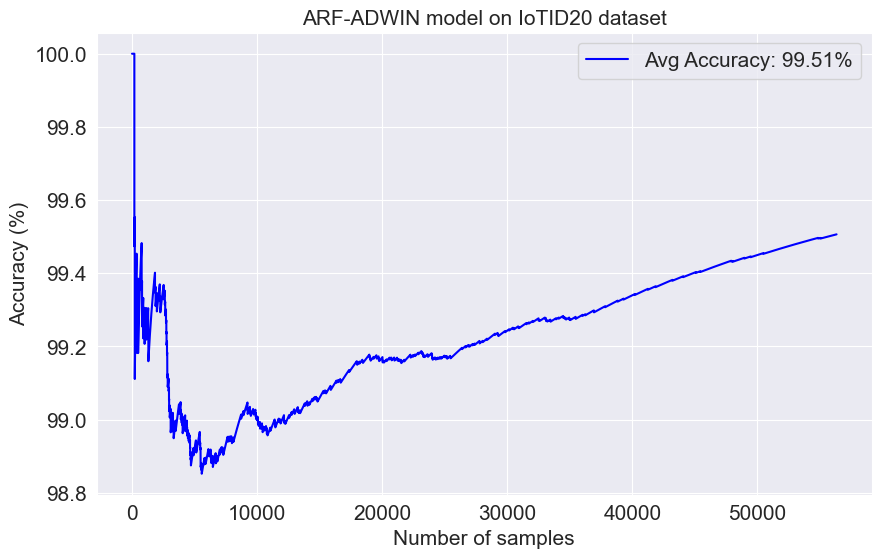

In [70]:
%%time
# Use the Adaptive Random Forest (ARF) model with ADWIN drift detector as a baseline model
name1 = "ARF-ADWIN model"
model1 = forest.ARFClassifier(n_models = 3, drift_detector = ADWIN()) # Define the model
t, m1, c1 = adaptive_learning(model1, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m1, name1) # Draw the figure of how the real-time accuracy changes with the number of samples
print("no of drifts: ",c1)

Change detected at index  7162
Change detected at index  14832
Change detected at index  28047
Accuracy: 99.75%
Precision: 99.69%
Recall: 96.48%
F1-score: 98.06%
no of drifts:  3
Wall time: 1min 35s


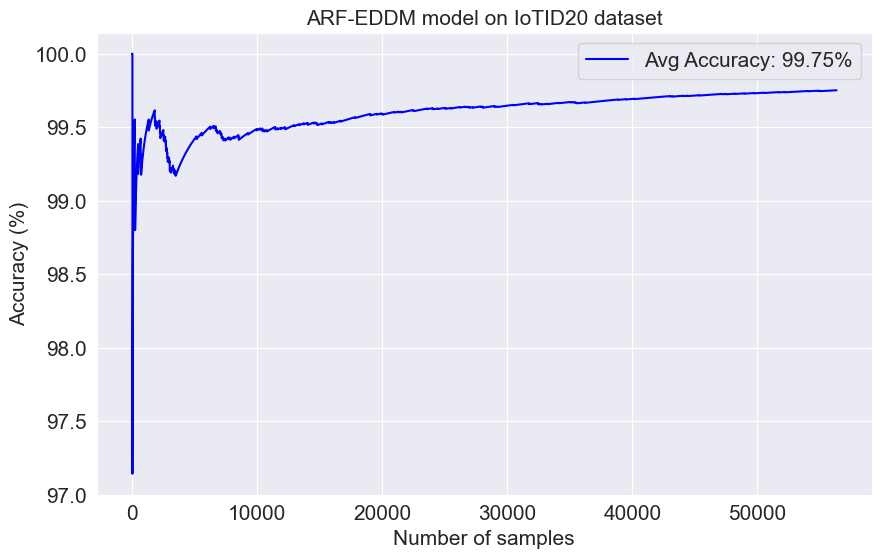

In [71]:
%%time
# Use the Adaptive Random Forest (ARF) model with EDDM drift detector
name2 = "ARF-EDDM model"
model2 = forest.ARFClassifier(n_models = 3, drift_detector = EDDM()) # Define the model
t, m2, c2 = adaptive_learning(model2, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m2, name2) # Draw the figure of how the real-time accuracy changes with the number of samples
print("no of drifts: ",c2)

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1-score: 100.0%
no of drifts:  0
Wall time: 10min 19s


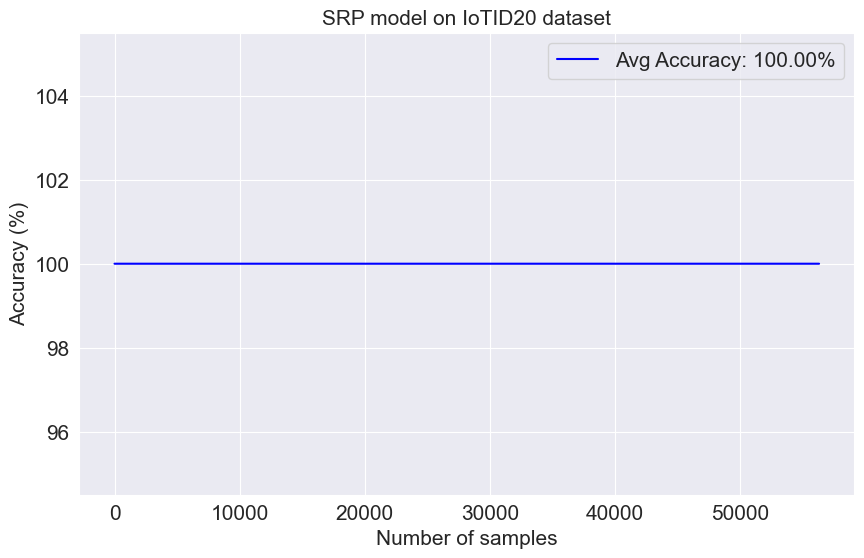

In [72]:
%%time
# Use the Streaming Random Patches (SRP) model
name3 = "SRP model"
model3 = ensemble.SRPClassifier(n_models = 3) # Define the model
t, m3, c3 = adaptive_learning(model3, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m3, name3) # Draw the figure of how the real-time accuracy changes with the number of samples
print("no of drifts: ",c3)

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1-score: 100.0%
no of drifts:  0
Wall time: 3min 3s


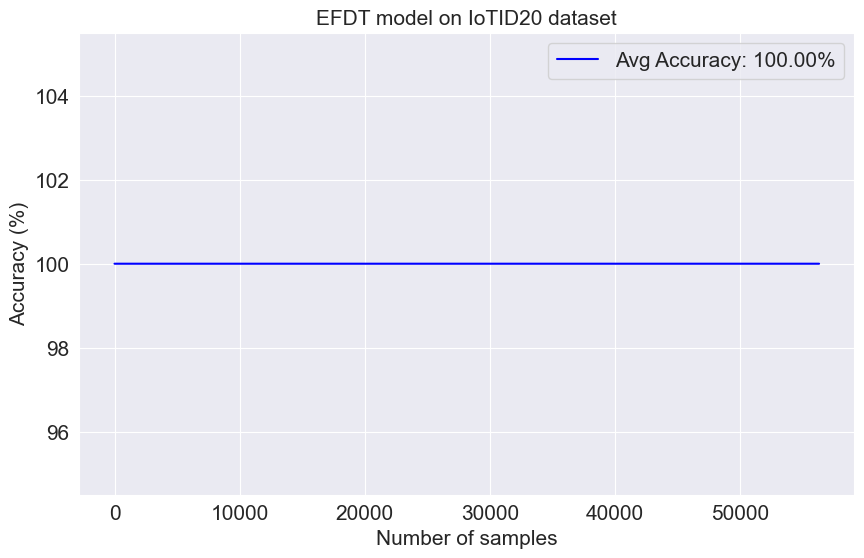

In [73]:
%%time
# Use the Extremely Fast Decision Tree (EFDT) model 
name4 = "EFDT model"
model4 = tree.ExtremelyFastDecisionTreeClassifier() # Define the model
t, m4, c4 = adaptive_learning(model4, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m4, name4) # Draw the figure of how the real-time accuracy changes with the number of samples
print("no of drifts: ",c4)

Change detected at index  595
Change detected at index  1151
Change detected at index  1711
Change detected at index  2221
Change detected at index  2683
Change detected at index  3043
Change detected at index  3441
Change detected at index  3910
Change detected at index  4391
Change detected at index  4822
Change detected at index  5212
Change detected at index  5663
Change detected at index  6250
Change detected at index  6664
Change detected at index  7132
Change detected at index  7752
Change detected at index  8415
Change detected at index  8911
Change detected at index  9304
Change detected at index  10618
Change detected at index  11126
Change detected at index  11670
Change detected at index  12182
Change detected at index  14438
Change detected at index  15190
Change detected at index  15778
Change detected at index  16280
Change detected at index  16610
Change detected at index  17048
Change detected at index  17664
Change detected at index  18184
Change detected at index  18

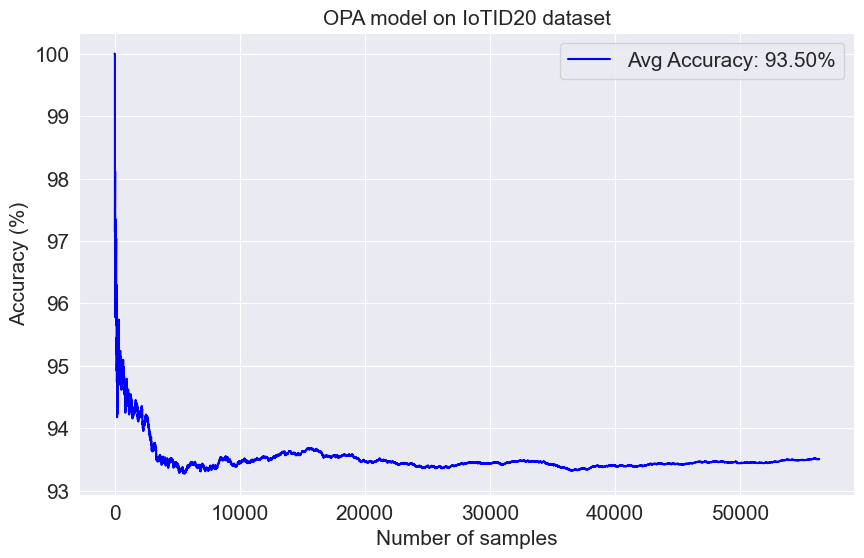

In [78]:
%%time
# Use the Online Passive-Aggressive (OPA) model
name5 = "OPA model"
model5 = linear_model.PAClassifier() # Define the model
t, m5, c5 = adaptive_learning(model5, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m5, name5) # Draw the figure of how the real-time accuracy changes with the number of samples
print("no of drifts: ",c5)

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1-score: 100.0%
no of drifts:  0
Wall time: 14min 39s


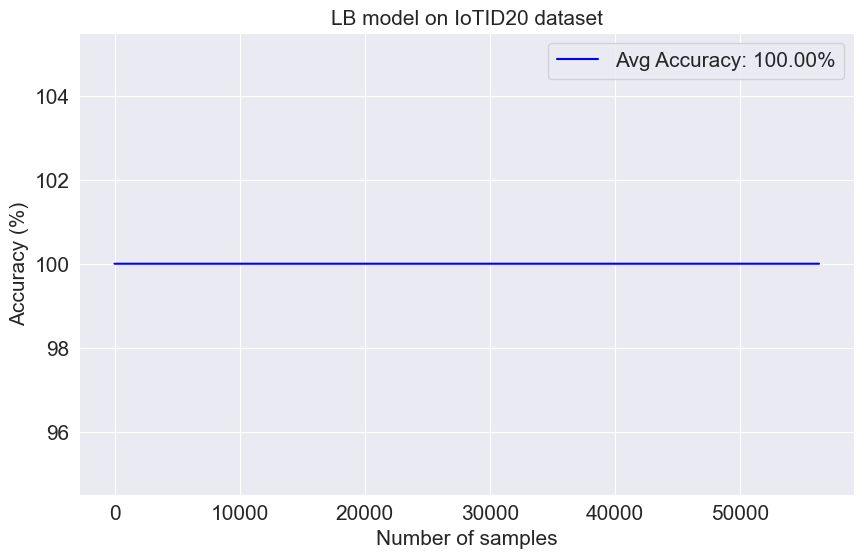

In [79]:
%%time
# Use the Leveraging Bagging (LB) model 
name6 = "LB model"
model6 = ensemble.LeveragingBaggingClassifier(model=tree.HoeffdingTreeClassifier(),n_models=3) # Define the model
t, m6, c6 = adaptive_learning(model6, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m6, name6) # Draw the figure of how the real-time accuracy changes with the number of samples
print("no of drifts: ",c6)

In [77]:
def PWPAE(X_train, y_train, X_test, y_test):
    # Record the real-time accuracy of PWPAE and 4 base learners
    metric = metrics.Accuracy()
    metric1 = metrics.Accuracy()
    metric2 = metrics.Accuracy()
    metric3 = metrics.Accuracy()
    metric4 = metrics.Accuracy()

    i=0
    t = []
    m = []
    m1 = []
    m2 = []
    m3 = []
    m4 = []
    yt = []
    yp = []

    hat1 = forest.ARFClassifier(n_models=3) # ARF-ADWIN
    hat2 = ensemble.SRPClassifier(n_models=2) # SRP-ADWIN
    hat3 = forest.ARFClassifier(n_models=3,drift_detector=DDM(),warning_detector=DDM()) # ARF-DDM
    hat4 = ensemble.SRPClassifier(n_models=2,drift_detector=DDM(),warning_detector=DDM()) # SRP-DDM

    selector1 = feature_selection.VarianceThreshold(threshold = 0.1)
    selector2 = feature_selection.SelectKBest(similarity=stats.PearsonCorr(),k=15)
    # Initial FS
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        selector1.learn_one(xi1) 
    
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        xi1 = selector1.transform_one(xi1)
        selector2.learn_one(xi1,yi1) 
        
    # Learn the training set
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        xi1 = selector1.transform_one(xi1)
        xi1 = selector2.transform_one(xi1)
        hat1.learn_one(xi1,yi1)
        hat2.learn_one(xi1,yi1)
        hat3.learn_one(xi1,yi1)
        hat4.learn_one(xi1,yi1)
    # Predict the test set
    for xi, yi in stream.iter_pandas(X_test, y_test):
        # The four base learner predict the labels
        xi = selector1.transform_one(xi)
        xi = selector2.transform_one(xi)
        y_pred1= hat1.predict_one(xi) 
        y_prob1= hat1.predict_proba_one(xi) 
        hat1.learn_one(xi,yi)

        y_pred2= hat2.predict_one(xi) 
        y_prob2= hat2.predict_proba_one(xi)
        hat2.learn_one(xi,yi)

        y_pred3= hat3.predict_one(xi) 
        y_prob3= hat3.predict_proba_one(xi)
        hat3.learn_one(xi,yi)

        y_pred4= hat4.predict_one(xi) 
        y_prob4= hat4.predict_proba_one(xi)
        hat4.learn_one(xi,yi)
        
        # Record their real-time accuracy
        metric1 = metric1.update(yi, y_pred1)
        metric2 = metric2.update(yi, y_pred2)
        metric3 = metric3.update(yi, y_pred3)
        metric4 = metric4.update(yi, y_pred4)    

        # Calculate the real-time error rates of four base learners
        e1 = 1-metric1.get()
        e2 = 1-metric2.get()
        e3 = 1-metric3.get()
        e4 = 1-metric4.get()

        
        ep = 0.001 # The epsilon used to avoid dividing by 0
        # Calculate the weight of each base learner by the reciprocal of its real-time error rate
        ea = 1/(e1+ep)+1/(e2+ep)+1/(e3+ep)+1/(e4+ep)
        w1 = 1/(e1+ep)/ea
        w2 = 1/(e2+ep)/ea
        w3 = 1/(e3+ep)/ea
        w4 = 1/(e4+ep)/ea
        # Make ensemble predictions by the classification probabilities
        if  y_pred1 == 1:
            ypro10=1-y_prob1[1]
            ypro11=y_prob1[1]
        else:
            ypro10=y_prob1[0]
            ypro11=1-y_prob1[0]
        if  y_pred2 == 1:
            ypro20=1-y_prob2[1]
            ypro21=y_prob2[1]
        else:
            ypro20=y_prob2[0]
            ypro21=1-y_prob2[0]
        if  y_pred3 == 1:
            ypro30=1-y_prob3[1]
            ypro31=y_prob3[1]
        else:
            ypro30=y_prob3[0]
            ypro31=1-y_prob3[0]
        if  y_pred4 == 1:
            ypro40=1-y_prob4[1]
            ypro41=y_prob4[1]
        else:
            ypro40=y_prob4[0]
            ypro41=1-y_prob4[0]        

        # Calculate the final probabilities of classes 0 & 1 to make predictions
        y_prob_0 = w1*ypro10+w2*ypro20+w3*ypro30+w4*ypro40
        y_prob_1 = w1*ypro11+w2*ypro21+w3*ypro31+w4*ypro41

        if (y_prob_0>y_prob_1):
            y_pred = 0
            y_prob = y_prob_0
        else:
            y_pred = 1
            y_prob = y_prob_1
        # Update the real-time accuracy of the ensemble model
        metric = metric.update(yi, y_pred)

        t.append(i)
        m.append(metric.get()*100)
        yt.append(yi)
        yp.append(y_pred)
        
        i=i+1
    print("Accuracy: "+str(round(accuracy_score(yt,yp),4)*100)+"%")
    print("Precision: "+str(round(precision_score(yt,yp),4)*100)+"%")
    print("Recall: "+str(round(recall_score(yt,yp),4)*100)+"%")
    print("F1-score: "+str(round(f1_score(yt,yp),4)*100)+"%")
    return t, m

Accuracy: 99.56%
Precision: 99.48%
Recall: 93.66%
F1-score: 96.48%
Wall time: 6min 23s


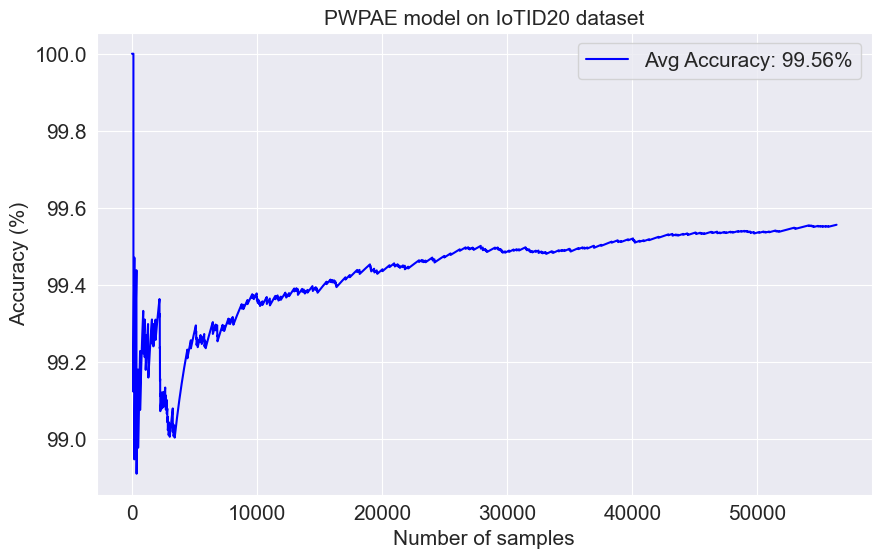

In [80]:
%%time
# Use the Performance Weighted Probability Averaging Ensemble (PWPAE) model 
name7 = "PWPAE model"
t, m7 = PWPAE(X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m7, name7) # Draw the figure of how the real-time accuracy changes with the number of samples

In [81]:
def MSANA(model1, model2, model3, model4, X_train, y_train, X_test, y_test):
    # Record the real-time accuracy of PWPAE and 4 base learners
    metric = metrics.Accuracy()
    metric1 = metrics.Accuracy()
    metric2 = metrics.Accuracy()
    metric3 = metrics.Accuracy()
    metric4 = metrics.Accuracy()
    
    metric_w1 = []
    metric_w2 = []
    metric_w3 = []
    metric_w4 = []


    i = 0
    c = 0
    t = []
    m = []
    m1 = []
    m2 = []
    m3 = []
    m4 = []
    yt = []
    yp = []

    hat1 = model1
    hat2 = model2
    hat3 = model3
    hat4 = model4
    
    # Define the two feature selections methods: Variance Threshold and Select-K-Best
    selector1 = feature_selection.VarianceThreshold(threshold = 0.1)
    selector2 = feature_selection.SelectKBest(similarity=stats.PearsonCorr(),k=40)
    
    # Use EDDM to detect concept drift, it can be replaced with other drift detection methods like ADWIN, DDM, etc.
    eddm = EDDM()
    drift = 0

    # Initial feature selection on the training set
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        selector1.learn_one(xi1) 
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        xi1 = selector1.transform_one(xi1)
        selector2.learn_one(xi1,yi1) 
        
    # Train the online models on the training set
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        xi1 = selector1.transform_one(xi1)
        xi1 = selector2.transform_one(xi1)
        hat1.learn_one(xi1,yi1)
        hat2.learn_one(xi1,yi1)
        hat3.learn_one(xi1,yi1)
        hat4.learn_one(xi1,yi1)

    # Predict the test set
    for xi, yi in stream.iter_pandas(X_test, y_test):
        # The four base learners predict the labels
        xi = selector1.transform_one(xi)
        xi = selector2.transform_one(xi)
        y_pred1= hat1.predict_one(xi) 
        y_prob1= hat1.predict_proba_one(xi) 
        hat1.learn_one(xi,yi)

        y_pred2= hat2.predict_one(xi) 
        y_prob2= hat2.predict_proba_one(xi)
        hat2.learn_one(xi,yi)

        y_pred3= hat3.predict_one(xi) 
        y_prob3= hat3.predict_proba_one(xi)
        hat3.learn_one(xi,yi)

        y_pred4= hat4.predict_one(xi) 
        y_prob4= hat4.predict_proba_one(xi)
        hat4.learn_one(xi,yi)
        
        if y_pred1 == yi:
            metric_w1.append(0)
        else:
            metric_w1.append(1)
        if y_pred2 == yi:
            metric_w2.append(0)
        else:
            metric_w2.append(1)
        if y_pred3 == yi:
            metric_w3.append(0)
        else:
            metric_w3.append(1)
        if y_pred4 == yi:
            metric_w4.append(0)
        else:
            metric_w4.append(1)
        
        # Record their real-time accuracy
        metric1 = metric1.update(yi, y_pred1)
        metric2 = metric2.update(yi, y_pred2)
        metric3 = metric3.update(yi, y_pred3)
        metric4 = metric4.update(yi, y_pred4)    

        
        # Calculate the real-time window error rates of four base learners
        if i<1000:
            e1 = 0
            e2 = 0
            e3 = 0
            e4 = 0
        else:        
            e1 = sum(metric_w1[round(0.9*i):i])/len(metric_w1[round(0.9*i):i])
            e2 = sum(metric_w2[round(0.9*i):i])/len(metric_w1[round(0.9*i):i])
            e3 = sum(metric_w3[round(0.9*i):i])/len(metric_w1[round(0.9*i):i])
            e4 = sum(metric_w4[round(0.9*i):i])/len(metric_w1[round(0.9*i):i])

        
        ep = 0.001 # The epsilon used to avoid dividing by 0
        
        # Calculate the weight of each base learner by the reciprocal of its window real-time error rate
        ea = 1/(e1+ep)+1/(e2+ep)+1/(e3+ep)+1/(e4+ep)
        w1 = 1/(e1+ep)/ea
        w2 = 1/(e2+ep)/ea
        w3 = 1/(e3+ep)/ea
        w4 = 1/(e4+ep)/ea
        # Make ensemble predictions by the classification probabilities
        if  y_pred1 == 1:
            ypro10=1-y_prob1[1]
            ypro11=y_prob1[1]
        else:
            ypro10=y_prob1[0]
            ypro11=1-y_prob1[0]
        if  y_pred2 == 1:
            ypro20=1-y_prob2[1]
            ypro21=y_prob2[1]
        else:
            ypro20=y_prob2[0]
            ypro21=1-y_prob2[0]
        if  y_pred3 == 1:
            ypro30=1-y_prob3[1]
            ypro31=y_prob3[1]
        else:
            ypro30=y_prob3[0]
            ypro31=1-y_prob3[0]
        if  y_pred4 == 1:
            ypro40=1-y_prob4[1]
            ypro41=y_prob4[1]
        else:
            ypro40=y_prob4[0]
            ypro41=1-y_prob4[0]        

        # Calculate the final probabilities of classes 0 & 1 to make predictions
        y_prob_0 = w1*ypro10+w2*ypro20+w3*ypro30+w4*ypro40
        y_prob_1 = w1*ypro11+w2*ypro21+w3*ypro31+w4*ypro41
        
#        print(str(i)+" "+str(w1)+" "+str(w2)+" "+str(w3)+" "+str(w4)+" "+str(y_prob_0)+" "+str(y_prob_1))

        if (y_prob_0>y_prob_1):
            y_pred = 0
            y_prob = y_prob_0
        else:
            y_pred = 1
            y_prob = y_prob_1
        
        # Update the real-time accuracy of the ensemble model
        metric = metric.update(yi, y_pred)
        # Detect concept drift
        val = 0
        if yi != y_pred:
            val = 1 
        eddm.update(float(val))
        
        if eddm.drift_detected & (i>1000) :
            c = c+1
            print(f"Change detected at index {i}")
            drift = 1 # indicating that a drift occurs
        
        # If a drift is detected
        if drift == 1: 
            x_new = X_test[round(0.9*i):i]
            y_new = y_test[round(0.9*i):i]
            
            # Relearn the online models on the most recent window data (representing new concept data)
            hat1 = forest.ARFClassifier(n_models=3) # ARF-ADWIN
            #hat2 = neighbors.KNNADWINClassifier(window_size=100)
            hat3 = forest.ARFClassifier(n_models=3,drift_detector=EDDM(),warning_detector=EDDM()) # ARF-EDDM
            hat4 = linear_model.PAClassifier() # SRP-DDM
            
            # Re-select features
            selector1 = feature_selection.VarianceThreshold(threshold = 0.1)
            selector2 = feature_selection.SelectKBest(similarity=stats.PearsonCorr(),k=40)
            
            for xj, yj in stream.iter_pandas(x_new, y_new):
                selector1 = selector1.learn_one(xj)
            for xj, yj in stream.iter_pandas(x_new, y_new):
                xj = selector1.transform_one(xj)
                selector2 = selector2.learn_one(xj, yj)      
            for xj, yj in stream.iter_pandas(x_new, y_new):
                xj = selector1.transform_one(xj)
                xa = selector2.transform_one(xj)
                hat1.learn_one(xa,yj)
                #hat2.learn_one(xa,yj)
                hat3.learn_one(xa,yj)
                hat4.learn_one(xa,yj)
                
                if j ==1:
                    print(len(xa))
                    j=0
            drift = 0   
        
        j=1
        

        t.append(i)
        m.append(metric.get()*100)
        
        yt.append(yi)
        yp.append(y_pred)
        
        i=i+1
    
    # outputs
    print("Accuracy: "+str(round(accuracy_score(yt,yp),4)*100)+"%")
    print("Precision: "+str(round(precision_score(yt,yp),4)*100)+"%")
    print("Recall: "+str(round(recall_score(yt,yp),4)*100)+"%")
    print("F1-score: "+str(round(f1_score(yt,yp),4)*100)+"%")
    print(metric1.get()*100)
    print(metric2.get()*100)
    print(metric3.get()*100)
    print(metric4.get()*100)
    return t, m, c

Change detected at index 1631
16
Change detected at index 2286
16
Change detected at index 3037
17
Accuracy: 98.89%
Precision: 98.04%
Recall: 84.56%
F1-score: 90.8%
97.24259157330303
98.78020631735941
98.15344187780757
92.39715203920385
no of drifts:  3
Wall time: 4min 6s


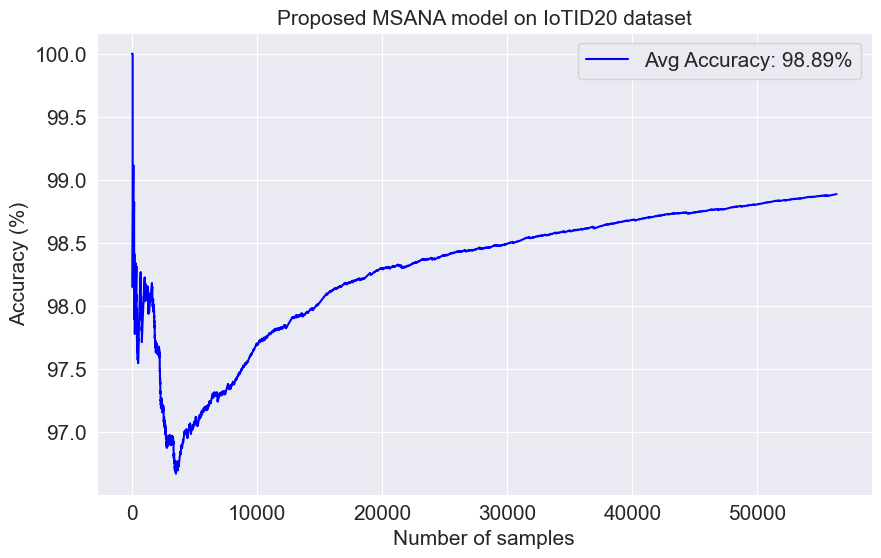

In [82]:
%%time
# Use the proposed Multi-Stage Automated Network Analytics (MSANA) model 

# Select the four base online models, they can be changed based on the performance of the models
bm1 = forest.ARFClassifier(n_models=3) # ARF-ADWIN
bm2 = forest.ARFClassifier(n_models=3,drift_detector=DDM(),warning_detector=DDM()) # ARF-DDM
bm3 = forest.ARFClassifier(n_models=3,drift_detector=EDDM(),warning_detector=EDDM()) # ARF-EDDM
bm4 = tree.ExtremelyFastDecisionTreeClassifier() # EFDT

name = "Proposed MSANA model"
t, m, c= MSANA(bm1, bm2, bm3, bm4, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples
print("no of drifts: ",c)

# 4) PLOTTING ALL DRIFT MODELS ACCURACY CURVES

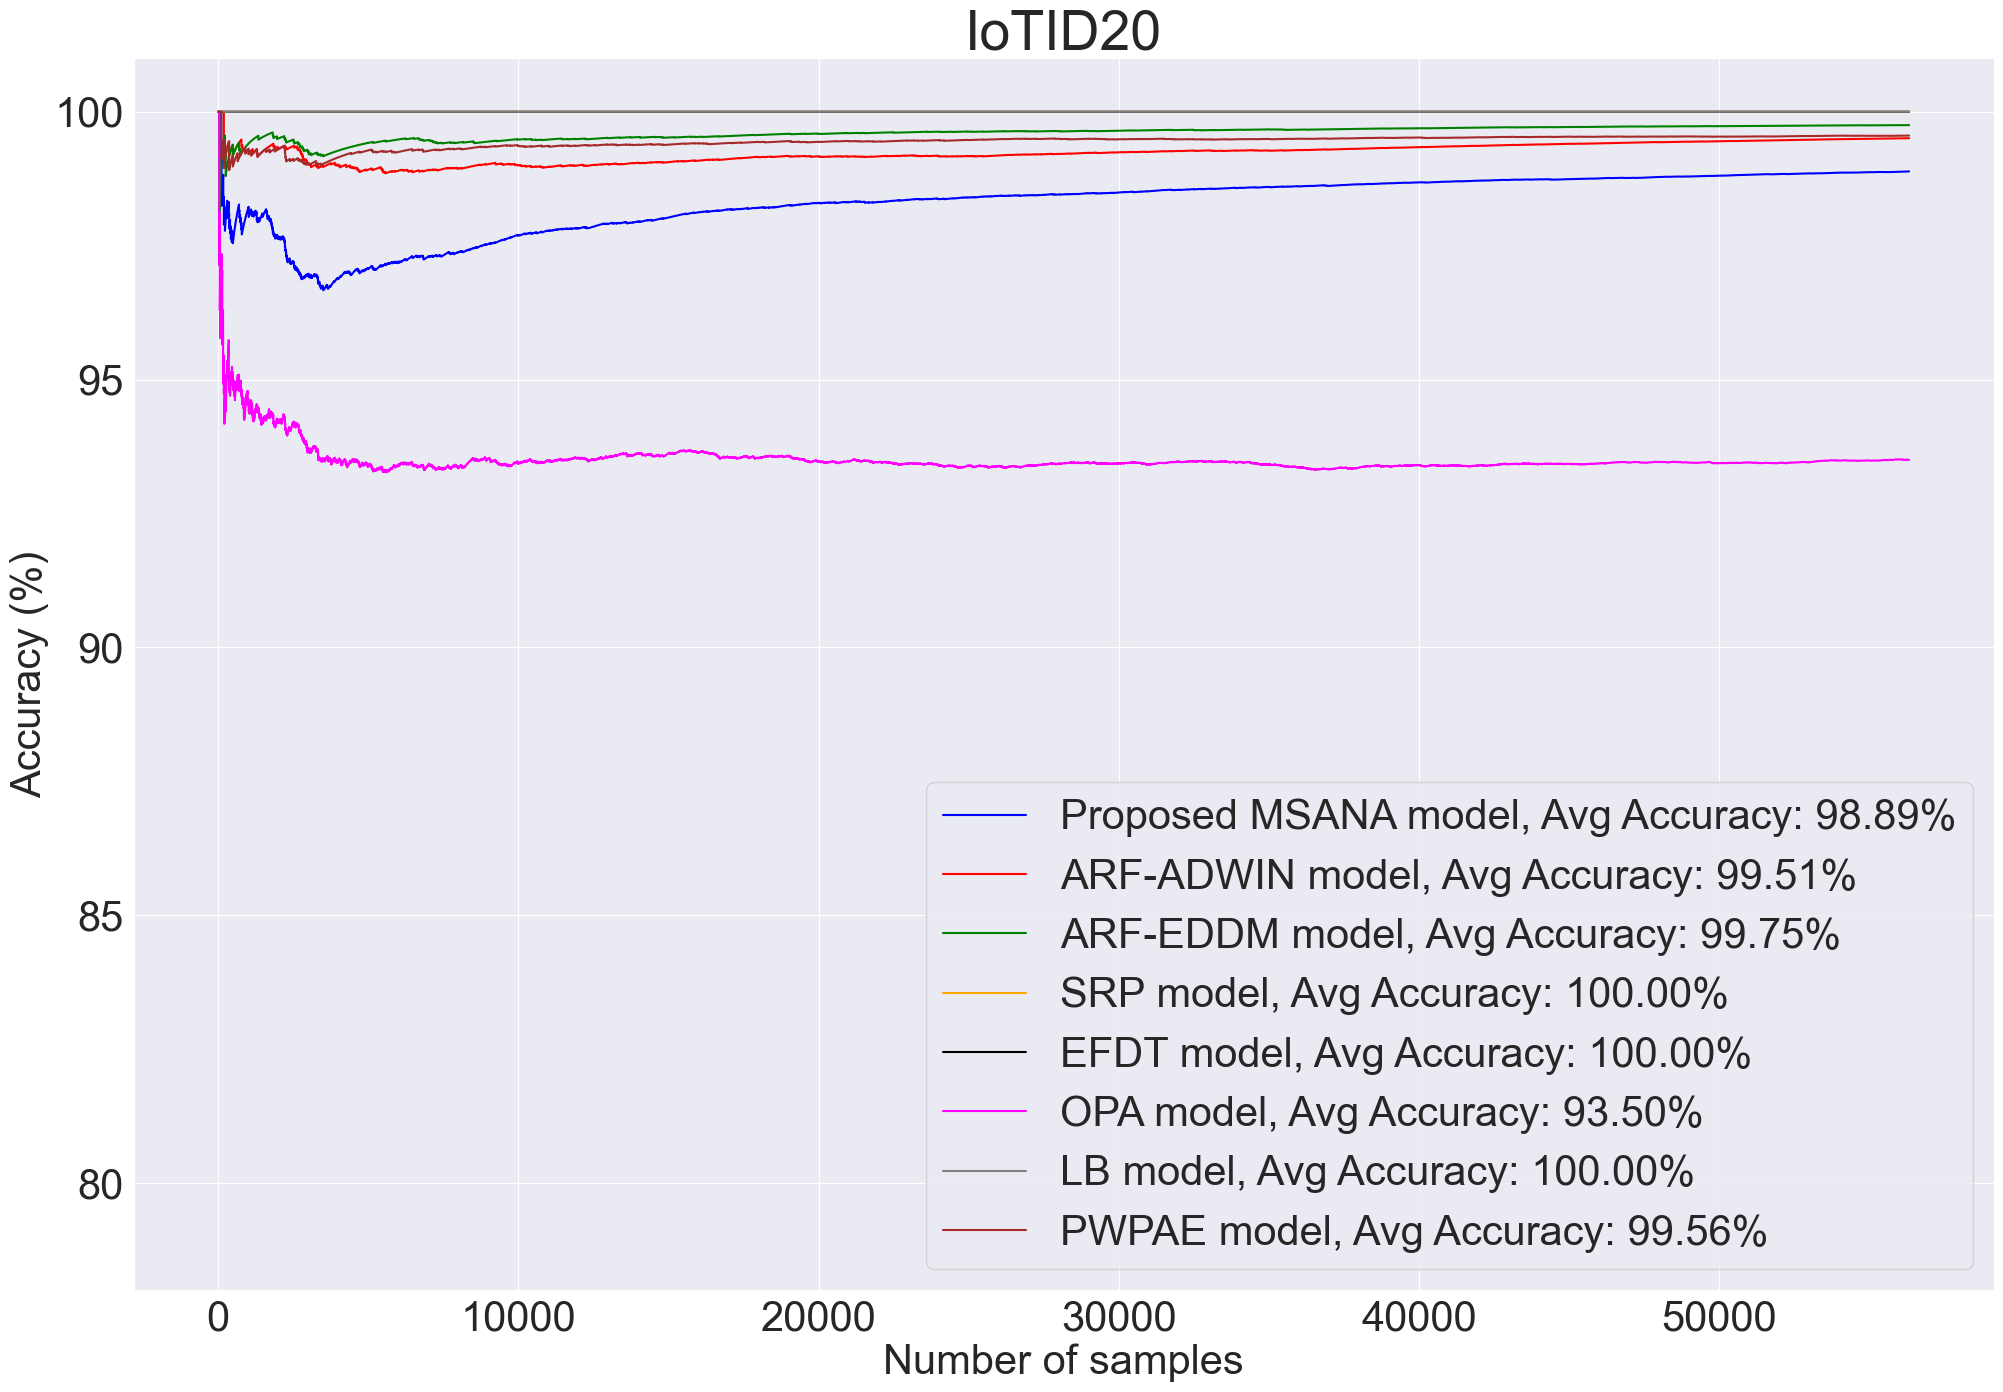

In [83]:
# Draw a comprehensive figure to compare the performance of all models
# https://matplotlib.org/stable/gallery/color/named_colors.html
plt.rcParams.update({'font.size': 30})
plt.figure(1,figsize=(24,16)) 
sns.set_style("darkgrid")
plt.clf() 

# Plot the accuracy change of each learner
plt.plot(t,m,'-b',label=name+', Avg Accuracy: %.2f%%'%(m[-1]))
# plt.plot(t,m0,'pink',label=name0+', Avg Accuracy: %.2f%%'%(m0[-1]))
plt.plot(t,m1,'-r',label=name1+', Avg Accuracy: %.2f%%'%(m1[-1]))
plt.plot(t,m2,'-g',label=name2+', Avg Accuracy: %.2f%%'%(m2[-1]))
plt.plot(t,m3,'orange',label=name3+', Avg Accuracy: %.2f%%'%(m3[-1]))
plt.plot(t,m4,'black',label=name4+', Avg Accuracy: %.2f%%'%(m4[-1]))
plt.plot(t,m5,'magenta',label=name5+', Avg Accuracy: %.2f%%'%(m5[-1]))
plt.plot(t,m6,'grey',label=name6+', Avg Accuracy: %.2f%%'%(m6[-1]))
plt.plot(t,m7,'brown',label=name7+', Avg Accuracy: %.2f%%'%(m7[-1]))        
plt.legend(loc='lower right')
plt.ylim(78, 101)
plt.title('IoTID20', fontsize=40)
plt.xlabel('Number of samples')
plt.ylabel('Accuracy (%)')

plt.draw()

# 5) DISPLAYING NUMBER OF DRIFTS DETECTED IN EACH MODEL

In [95]:
print('MSANA : ',c)
print('ARF-ADWIN :',c1)
print('ARF-EDDM :',c2)
print('SRP :',c3)
print('EFDT :',c4)
print('OPA:',c5)
print('LB :',c6)

MSANA :  3
ARF-ADWIN : 6
ARF-EDDM : 3
SRP : 0
EFDT : 0
OPA: 57
LB : 0
